In [53]:
import random
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import pandas as pd
#import imageio
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline
import math

In [54]:
SEED = 1234#固定种子，大家都可以重复结果
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
random.seed(SEED) 
torch.backends.cudnn.deterministic = True

x = torch.unsqueeze(torch.linspace(-1, 1, 21), dim=1)
ytrain = torch.sin(math.pi*x) + 0.2*torch.randn(x.size())  # 这里是污染数据固定不变当成训练数据


#为了进行早停，设置了一组测试数据
SEED = 4321

torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
random.seed(SEED) 
torch.backends.cudnn.deterministic = True

ytest = torch.sin(math.pi*x) + 0.2*torch.randn(x.size())

In [55]:
class Net(torch.nn.Module):  # 定义网络
    def __init__(self, n_feature, n_hidden1, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)  # 全连接层
        self.predict = torch.nn.Linear(n_hidden1, n_output)   # 输出层

    def forward(self, x):
        x = self.hidden1(x)
        x = torch.sigmoid(x)
        x = self.predict(x)  # 前向传播过程
        return x
#经典的sigmoid神经网络1*n_hidden1*1，中间隐层为sigmoid函数

In [56]:
net = Net(n_feature=1, n_hidden1=10, n_output=1)
device = torch.device('cpu')#cpu计算就足够了，不是图像数据，所以不用GPU
optimizer = torch.optim.Adam(net.parameters(), lr=0.01,betas=(0.96,0.96))
#Adam算法，学习率是固定的0.01，矩参数是0.96

loss_func = torch.nn.MSELoss().to(device)  # loss函数是均方误差mse
x = x.to(device)
ytrain = ytrain.to(device)#把数据都载入到device上
ytest = ytest.to(device)#

In [57]:
epoch = 20000
para0 = torch.zeros(epoch)  # para0用来记录train时每个epoch时的loss函数值
para1 = torch.zeros(epoch)  # para1用来记录test时每个epoch时的loss函数值

for t in range(epoch):
    prediction = net(x)
    loss = loss_func(prediction, y)
    para0[t] = loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 10 == 0:
        prediction_test = net(x)
        loss_test = loss_func(prediction_test, ytest)
        para1[t] = loss_test.item()
        print(f"Epoch {t}: loss_test / loss = {loss_test.item() / loss.item()}")
        if loss_test.item() / loss.item() > 5:
            print(f"Early stopping at t = {t}, loss_test / loss > 5")
            print(f"loss_test: {loss_test}")
            print(f"loss: {loss}")
            break


Epoch 0: loss_test / loss = 0.9166525955028736
Epoch 10: loss_test / loss = 1.1785174572562558
Epoch 20: loss_test / loss = 1.1693705324081527
Epoch 30: loss_test / loss = 1.1010613642166445
Epoch 40: loss_test / loss = 1.0356787553230724
Epoch 50: loss_test / loss = 1.0605090780768798
Epoch 60: loss_test / loss = 1.106727015885251
Epoch 70: loss_test / loss = 1.0460209138112802
Epoch 80: loss_test / loss = 0.9586120777175584
Epoch 90: loss_test / loss = 0.9776176199904473
Epoch 100: loss_test / loss = 0.9935126732348504
Epoch 110: loss_test / loss = 0.9709039969603347
Epoch 120: loss_test / loss = 1.0151557706754486
Epoch 130: loss_test / loss = 1.043729962039868
Epoch 140: loss_test / loss = 1.0272956372719362
Epoch 150: loss_test / loss = 1.0428079666682362
Epoch 160: loss_test / loss = 1.007978849891168
Epoch 170: loss_test / loss = 1.0122564431418664
Epoch 180: loss_test / loss = 0.9986047388904822
Epoch 190: loss_test / loss = 1.022243350980674
Epoch 200: loss_test / loss = 1.026

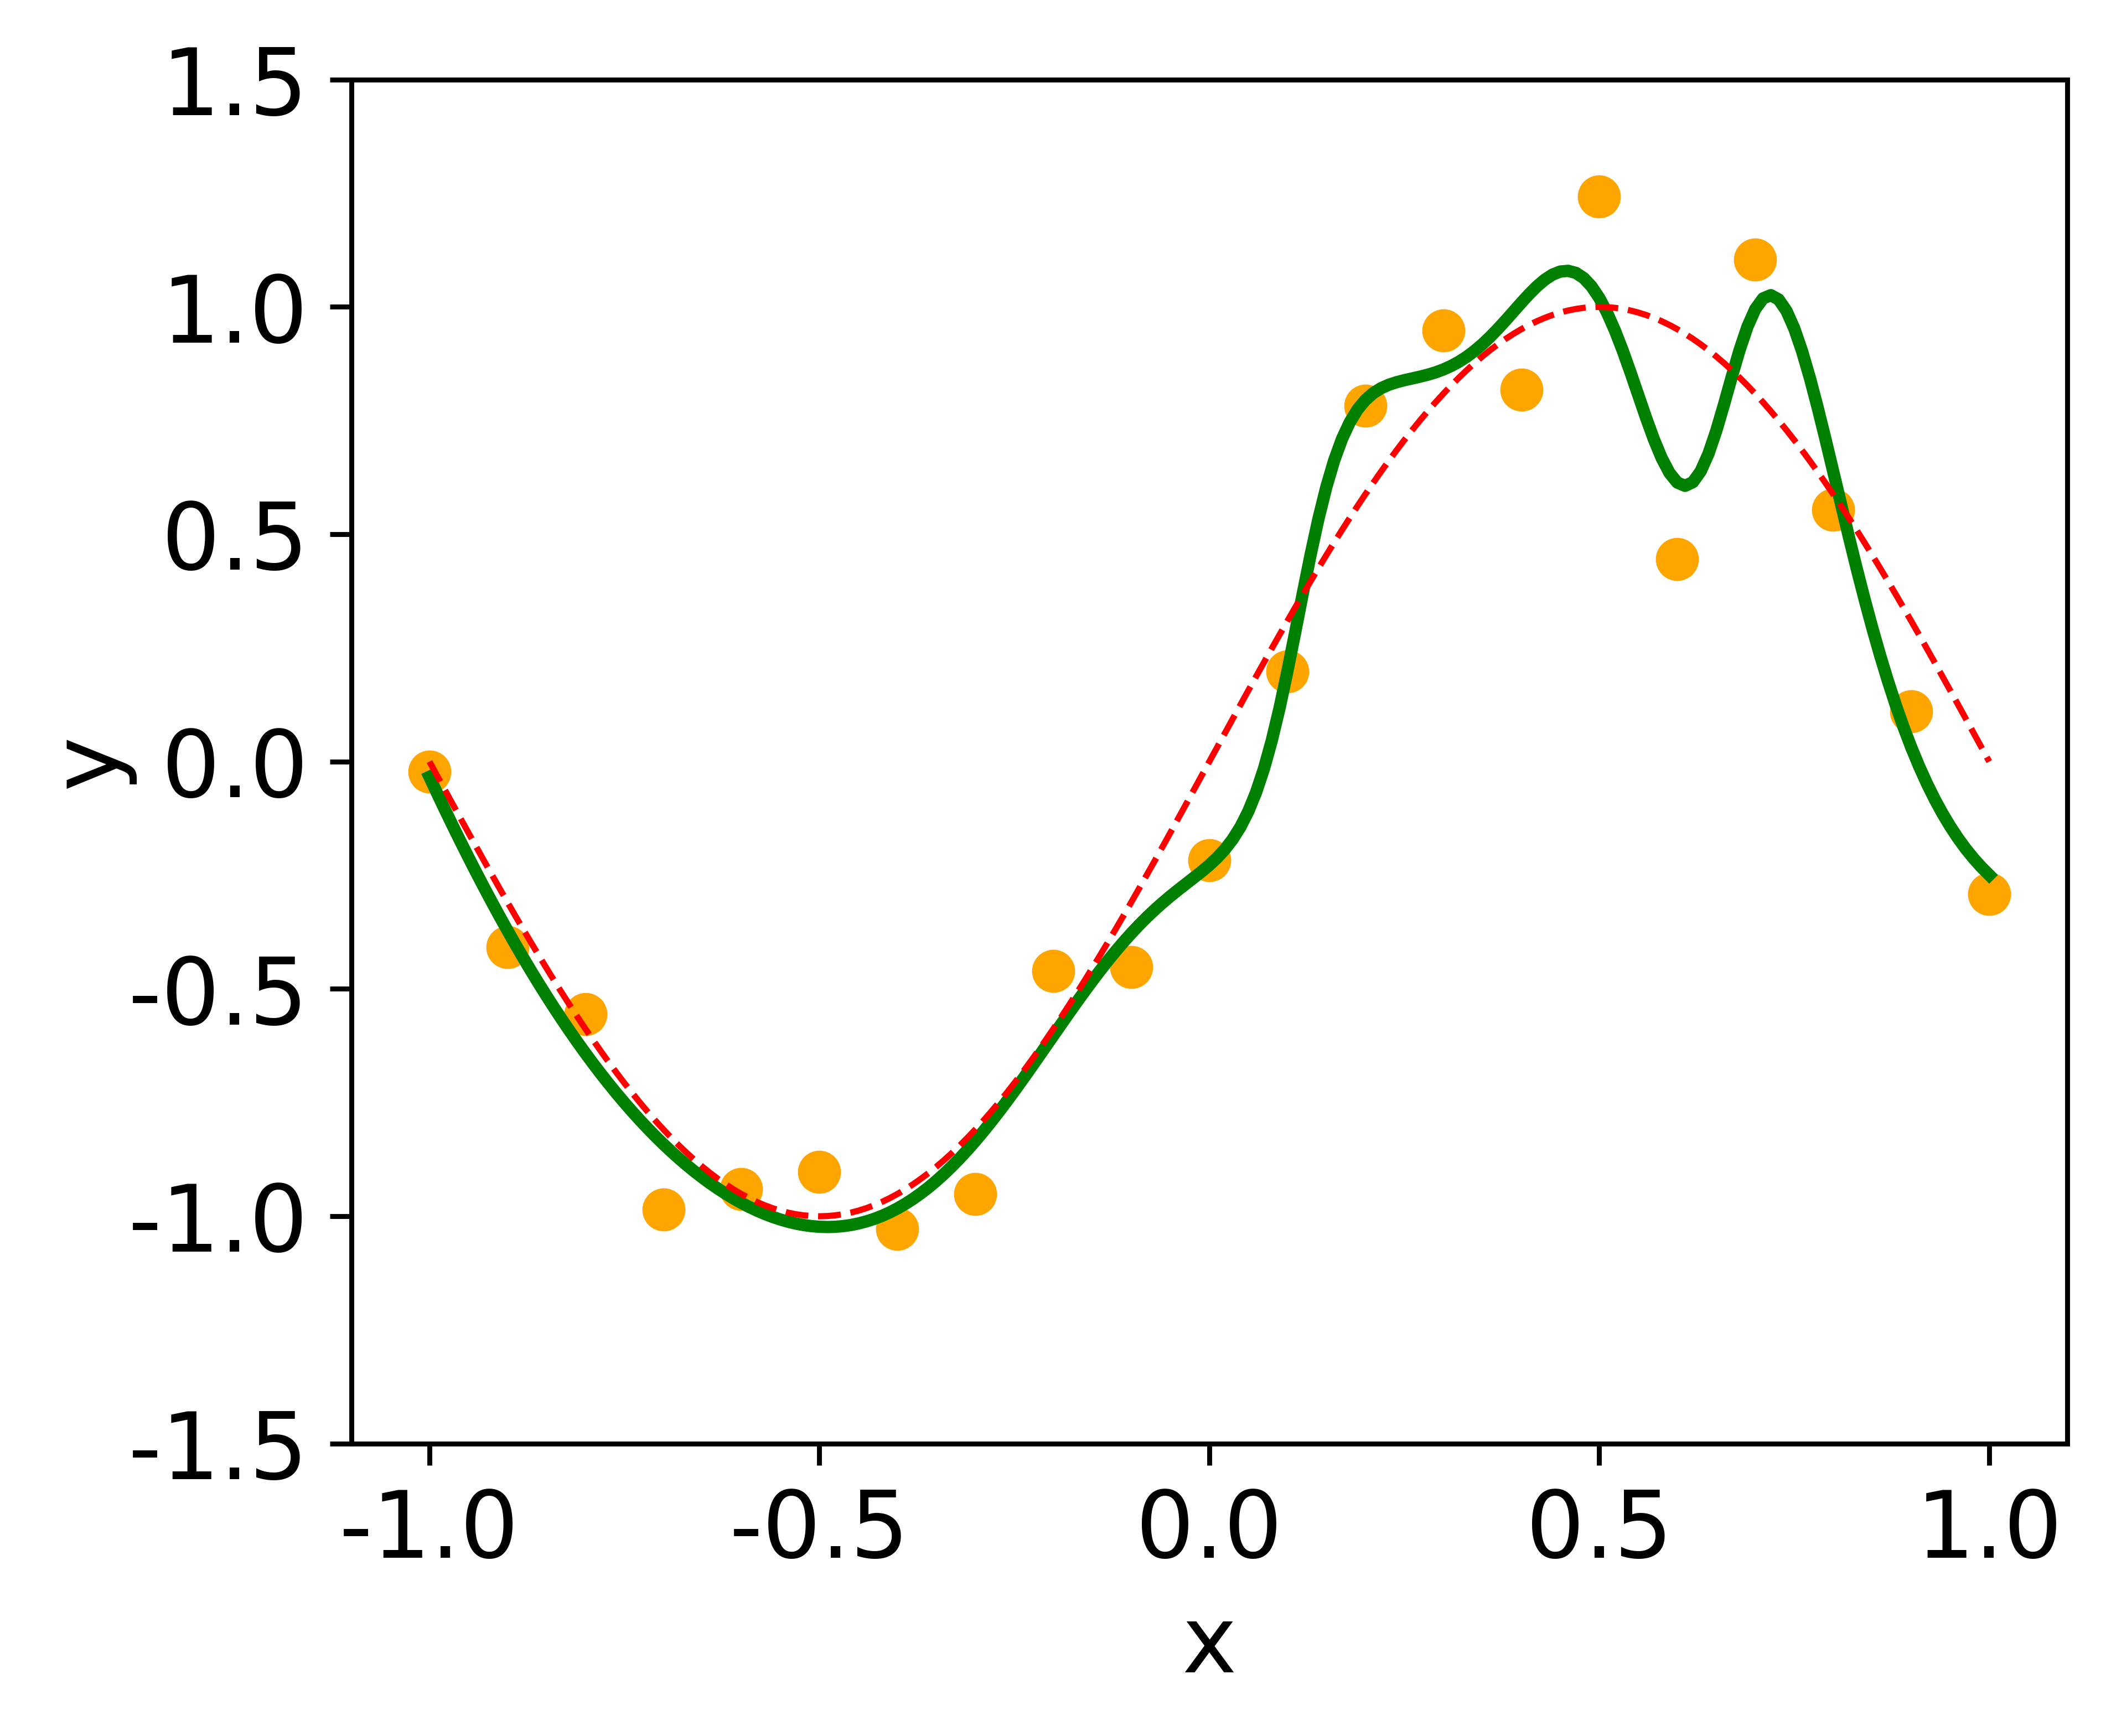

In [58]:
#画出网络学习曲线
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams ['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus']=False  # #用来正常显示负号
#plt.style.use(['science','ieee'])#如果找不到science plot包则载入这句话
fig, ax = plt.subplots(figsize=(5,4)) 
plt.cla()
plt.tick_params(labelsize=15)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15, labelpad = -1)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.5, 1.5)

# 训练集橘色的散点
ax.scatter(x.data.numpy(), y.data.numpy(), color="orange")
#网络拟合输出
input = torch.unsqueeze(torch.linspace(-1, 1, 201), dim=1)
output = net(input)  # 非常密的输入和网络输出
ax.plot(input.data.numpy(), output.data.numpy(), 'g-', lw=2)
#真实信号
signal = torch.sin(math.pi*input)
ax.plot(input.data.numpy(), signal.data.numpy(), 'r--', lw=1,label='signal')

In [60]:
####来一组继续测试
SEED = 666

torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
random.seed(SEED) 
torch.backends.cudnn.deterministic = True

xxx = torch.unsqueeze(torch.linspace(-1, 1, 41), dim=1)#这里我们采样数目不一样
yyy = torch.sin(math.pi*xxx) + 0.2*torch.randn(xxx.size())

prediction3 = net(xxx)  # 前向过程
loss3 = loss_func(prediction3, yyy)     # 计算loss，通过prediction和y的差来计算mse
print(loss3.data)# 大约是10^{-2}次级别，与拟合的误差相比，泛化误差非常大，相差2个数量级

tensor(0.0466)


In [61]:
#early stopping让训练误差与测试误差达到一个数量级最好！
#但是这是你要预测他们有多大差距，设置好条件

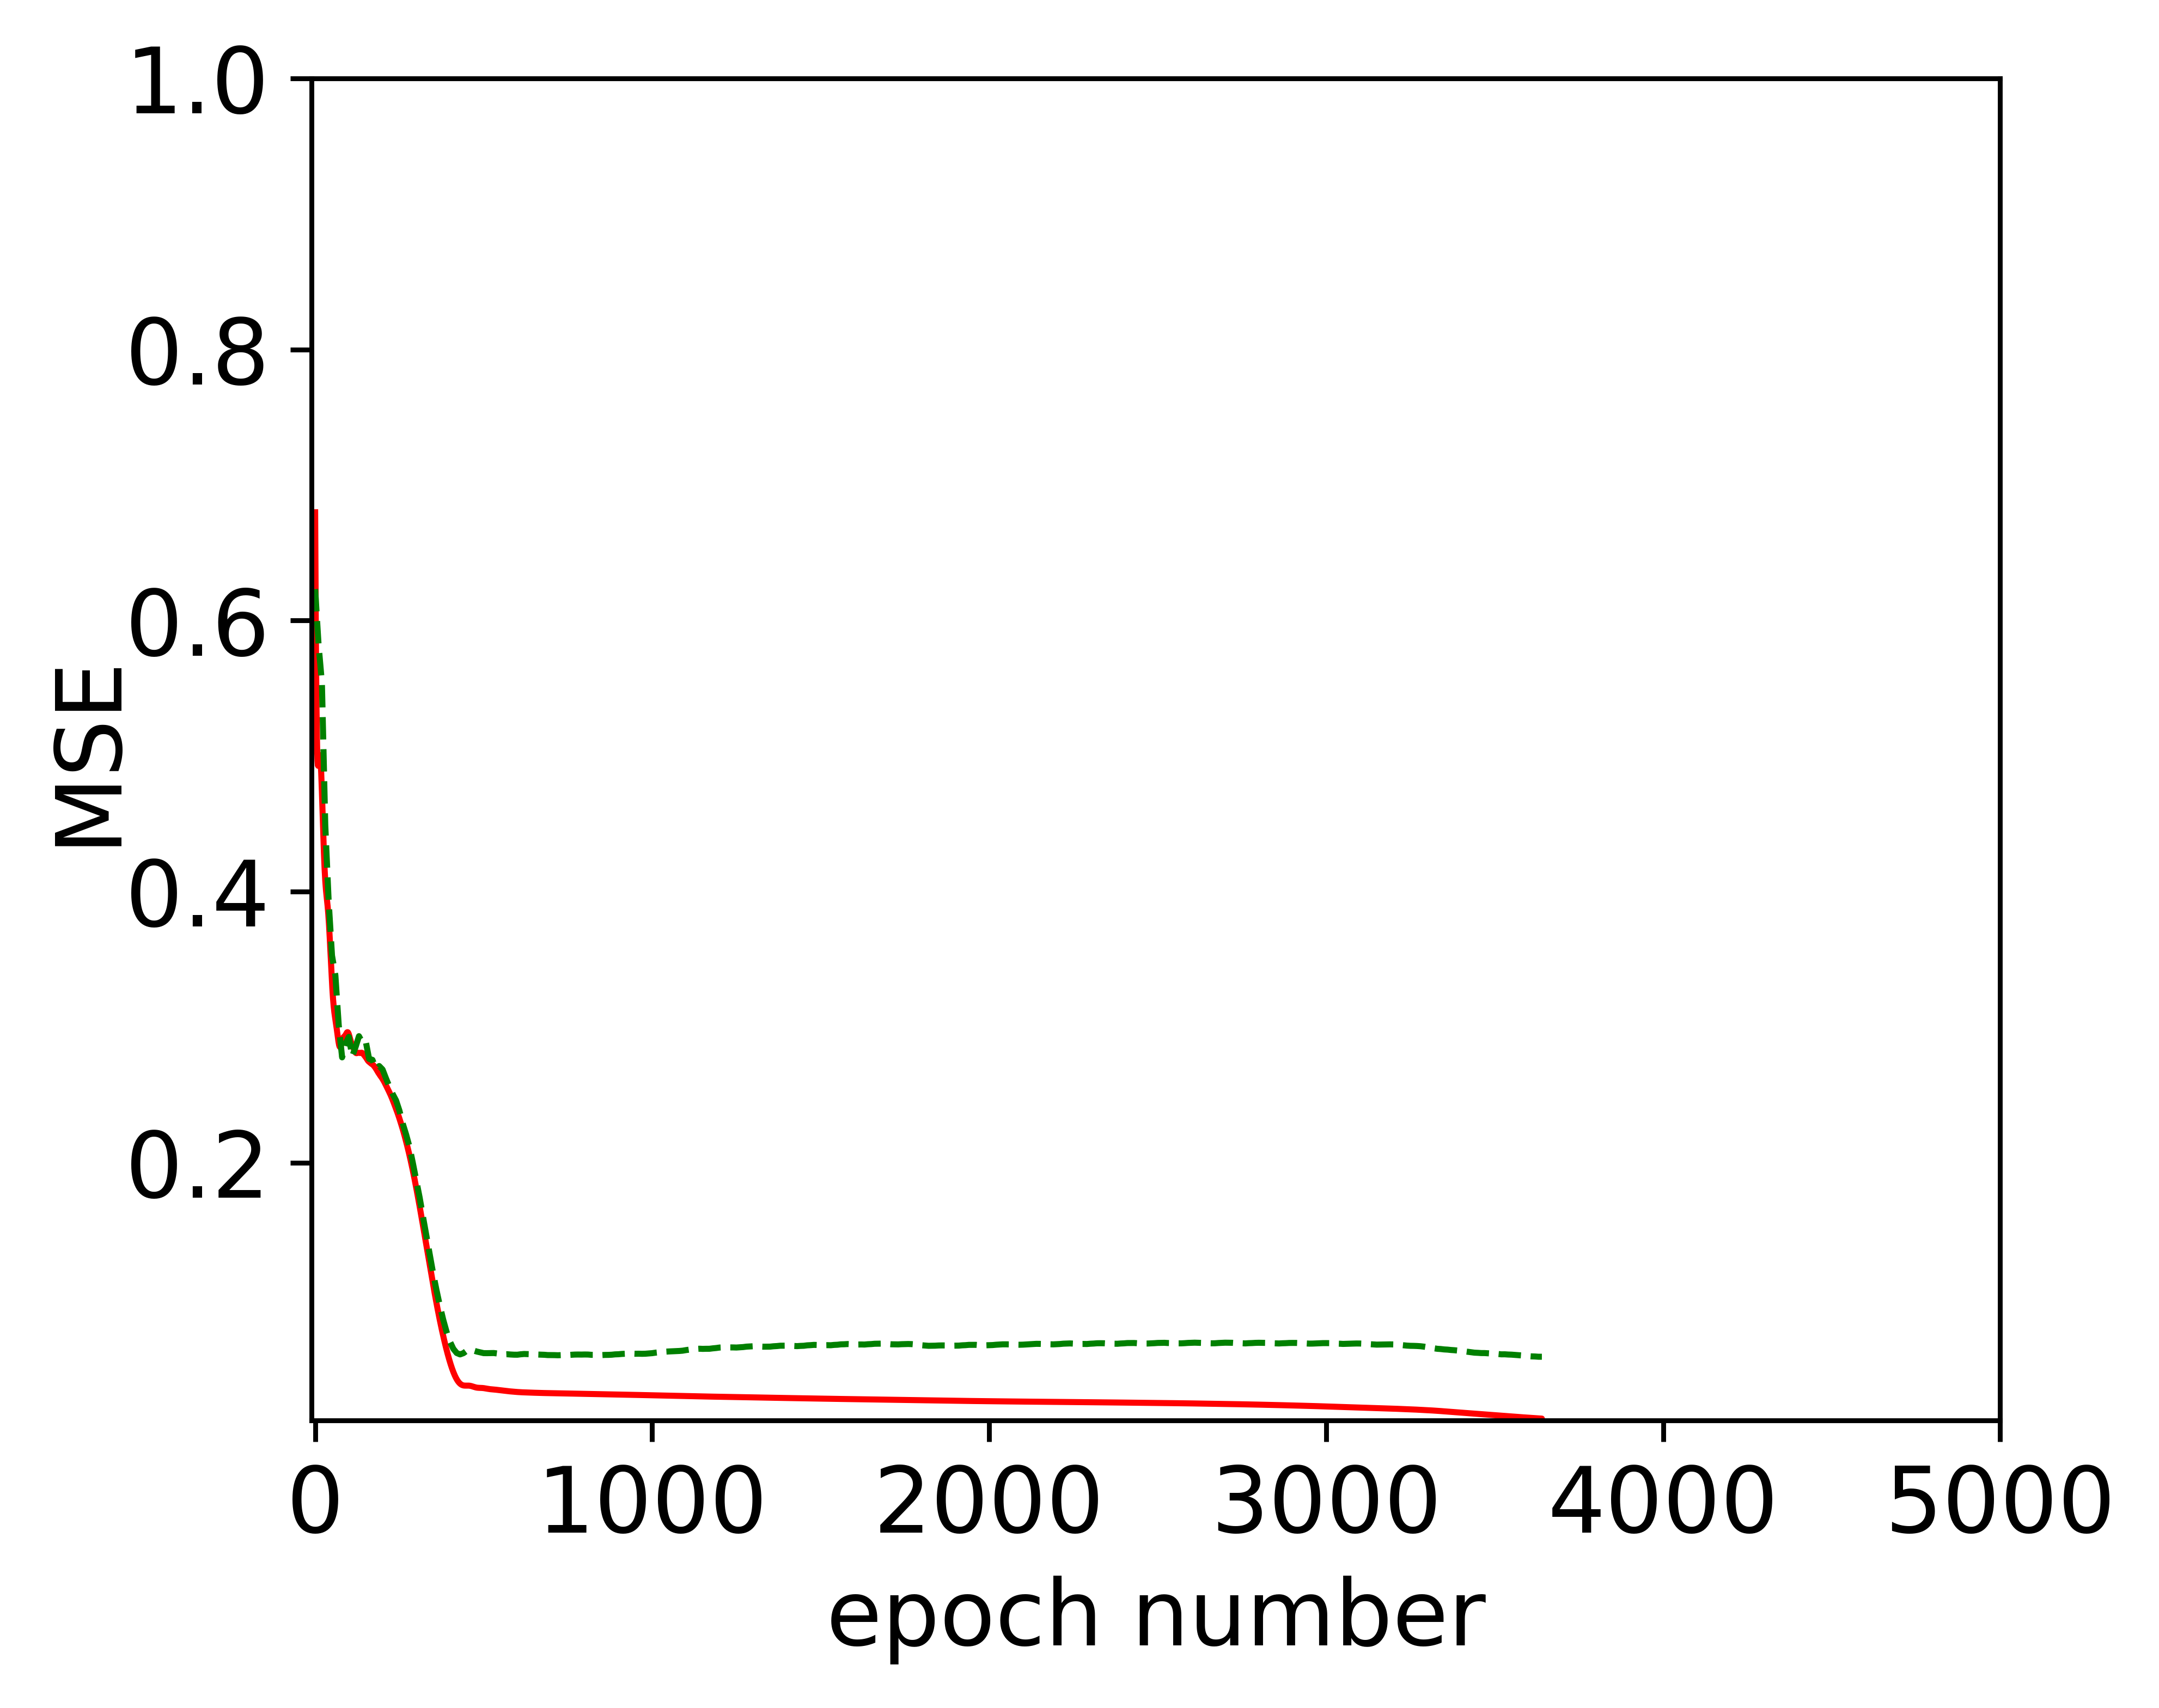

In [63]:
#画出loss学习曲线
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams ['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus']=False  # #用来正常显示负号
fig, ax = plt.subplots(figsize=(5,4)) 
plt.cla()
plt.tick_params(labelsize=15)
ax.set_xlabel('epoch number', fontsize=15)
ax.set_ylabel('MSE', fontsize=15, labelpad = -1.2)
ax.set_xlim(-10, 5000)
ax.set_ylim(0.01, 1)
ax.plot(para0.data.numpy(), 'r-', lw=1)
ax.plot(range(0, t+1, 10), para1[:t+1:10].numpy(), 'g--', lw=1)
plt.show()